# Confidence interval (1)

This notebook covers the following cases:

1. known $\sigma$, data with normal distribution, any sample size
2. known $\sigma$, data with unknown distribution, large sample ($n \ge 30$)

## Imports and data

Required imports

In [2]:
import numpy as np
import scipy.stats as stats
import math
import matplotlib.pyplot as plt

Configure values for the problem space

In [3]:
mu = 450
sigma = 10
n = 100
LoCpc = 95

Calculate other required values

In [4]:
stdErr = sigma / math.sqrt(n)

Prepare a random sample to work with (with the given parameters)

In [5]:
sample = np.random.normal(loc=mu, scale=sigma, size=n)
sample

array([454.36924435, 457.86585174, 442.95088736, 445.28424712,
       447.85929655, 446.3649629 , 449.39910951, 453.43340881,
       457.49346933, 451.02553916, 439.90525524, 432.28502246,
       457.62906538, 454.09896544, 447.95767199, 460.96874567,
       459.1488384 , 438.62235224, 428.69489169, 445.01320439,
       430.55991235, 441.47597282, 441.57922342, 461.38243099,
       467.38384473, 446.80091758, 434.77382553, 423.38134102,
       436.68280132, 450.98135722, 448.39682149, 458.37839998,
       464.65495229, 447.82624816, 442.67044616, 456.99740873,
       444.40315095, 444.0386788 , 475.15371239, 464.99870855,
       449.44953173, 456.90688469, 459.98852313, 450.67703307,
       452.68426022, 435.6488122 , 448.14836693, 463.49974432,
       452.15088574, 445.99355276, 436.30351115, 450.16278752,
       443.26516736, 441.0214705 , 442.62486172, 458.96636185,
       444.43134179, 438.85090293, 438.22826006, 432.55645313,
       455.51987534, 462.79450903, 460.95799935, 449.54

## Preparation

We calculate the sample mean, $\bar{x}$.

In [6]:
xmean = stats.mstats.tmean(sample)
xmean

449.86990584319

## Confidence interval

Now we can go through the same steps as we do manually to determine the confidence interval.


Find the cut-off points in the z-distribution. The first argument to `interval()` is the confidence as a fraction of 1.

In [7]:
zAlphaHalvedNeg, zAlphaHalvedPos = stats.norm.interval(LoCpc / 100)
print(zAlphaHalvedNeg, zAlphaHalvedPos)

-1.959963984540054 1.959963984540054


De-normalise the upper cut-off point.

In [8]:
halfIntervalWidth = zAlphaHalvedPos * stdErr
halfIntervalWidth

1.959963984540054

Print the confidence interval.

In [9]:
print('Confidence interval: {0:.3f} \u00b1 {1:.3f}'.format(xmean, halfIntervalWidth))

Confidence interval: 449.870 ± 1.960


**Rather than employing the step-by-step approach as in manual calculations, the interval can be obtained by getting the lower and upper cut-off values in one step:**

In [10]:
COl, COu = stats.norm.interval(LoCpc / 100, xmean, stdErr)
print('Cut-off values: {0:.3f}, {0:.3f}'.format(COl, COu))
print('Confidence interval: {0:.3f} \u00b1 {1:.3f}'.format(xmean, COu - xmean))

Cut-off values: 447.910, 447.910
Confidence interval: 449.870 ± 1.960


## Plot

Prepare the data

In [12]:
halfFigWidthInStdErr = 3
pointsPerStdErr = 20
plotXMin = xmean - halfFigWidthInStdErr * stdErr
plotXMax = xmean + halfFigWidthInStdErr * stdErr
plotYMin = 0
plotYMax = stats.norm.pdf(xmean, xmean, stdErr) * 1.2

x = np.linspace(plotXMin, plotXMax, pointsPerStdErr * halfFigWidthInStdErr * 2)

Plot

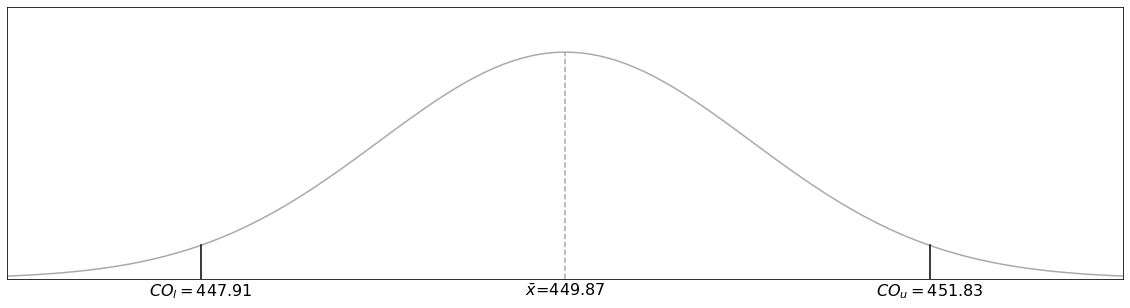

In [24]:
plt.figure(figsize=(20,5)) 
plt.xlim([plotXMin, plotXMax])
plt.tick_params(length=0)
plt.ylim([0, plotYMax])

plt.xticks([xmean - halfIntervalWidth, xmean, xmean + halfIntervalWidth], 
           [r'$CO_l={0:.2f}$'.format(xmean - halfIntervalWidth), 
            r'$\bar x$={0:.2f}'.format(xmean), 
            r'$CO_u={0:.2f}$'.format(xmean + halfIntervalWidth)], fontsize=16)
plt.yticks([])

plt.plot(x, stats.norm.pdf(x, xmean, stdErr), color='darkgray')
plt.plot([xmean - halfIntervalWidth, xmean - halfIntervalWidth], 
         [0, stats.norm.pdf(xmean - halfIntervalWidth, xmean, stdErr)], color='black')
plt.plot([xmean + halfIntervalWidth, xmean + halfIntervalWidth], 
         [0, stats.norm.pdf(xmean - halfIntervalWidth, xmean, stdErr)], color='black')
plt.plot([xmean, xmean], [0, stats.norm.pdf(xmean, xmean, stdErr)], color='darkgray', linestyle='--')
plt.show()